# <p style='text-align: center;'> Data Analysis E-Commerce Project </p>



## Business Problem Understanding

<b> The dataset consists of transactional data with customers in different countries who make purchases from an online retail 
    
<b> company based in the United Kingdom (UK).

    
<b> Company: UK-based and online retail.

    
<b> Products for selling: Mainly all-occasion gifts.

    
<b> Customers: Most are wholesalers (local or international).

    
<b> Transactions Period Data : From 1st Dec 2010 to 9th Dec 2011 (One year)
    
 
### From this dataset we need extract these results as follows:    
    
- Highest number of orders from specific country.
    
    
- Highest money spent on purchase specific country.
    
    
- Top 5 countries place the highest number of orders.
    
    
- Top 5 countries spent the money on purchase products.
    
    
- Highest sales on specific Month.
    
    
- There are no transactions on between dates.
    
    
- Sales increase days.
    
    
- Sales decrease days.
    
    
- Highest number of orders hours and etc.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## Data Understanding
### Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv('data.csv')

# Display the first 5 lines using the head() method.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Display the last 5 lines using the tail() method.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


### Data Understanding
<b> Let’s have a look at data dimensionality.

In [4]:
df.shape

(541909, 8)

<b> From the output, we can see that the table contains 541909 rows and 8 columns.
    
<b> We can use the info() method to output some general information about the dataframe:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<b> object, int64 and float64 are the data types of our features. We see 3 features are numeric (1 feature is int64 + 2 features are float64) and 5 features are categorical. With this same method, we can easily see if there are any missing values. Here, there are some missing values in variables.
    
    
<b> Here 8 variables are there, 3 features are numeric (1 feature is int64 + 2 features are float64) and 5 features are categorical. The details of these variables as follows :
    
- **InvoiceNo (invoice_num):** A number assigned to each transaction.
    
    
- **StockCode (stock_code):** Product code.
    
    
- **Description (description):** Product name.
    
    
- **Quantity (quantity):** Number of products purchased for each transaction.
    
    
- **InvoiceDate (invoice_date):** Timestamp for each transaction.
    
    
- **UnitPrice (unit_price):** Product price per unit.
    
    
- **CustomerID (cust_id):** Unique identifier each customer.
    
    
- **Country (country):** Country name.

<b> Displaying total columns from Dataset

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<b> Getting all columns one by one

In [7]:
for column in df.columns:
    print(column)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


## Data Preprocessing

<b> Renaming columns names

In [8]:
d = { 
        'InvoiceNo': 'invoice_num',
        'StockCode' : 'stock_code',
        'Description' : 'description',
        'Quantity' : 'quantity',
        'InvoiceDate' : 'invoice_date',
        'UnitPrice' : 'unit_price',
        'CustomerID' : 'cust_id',
        'Country' : 'country'
}

In [9]:
df.rename(columns = d, inplace = True)

<b> After changing column names Checking new column names

In [10]:
df.columns

Index(['invoice_num', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'cust_id', 'country'],
      dtype='object')

In [11]:
for i in df.columns:
    print(i)

invoice_num
stock_code
description
quantity
invoice_date
unit_price
cust_id
country


<b> Lets check initial data, checking first five rows

In [12]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<b> Checking columns data types

In [13]:
df.dtypes

invoice_num      object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
cust_id         float64
country          object
dtype: object

<b> Checking the statistical description of columns.
    
The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [14]:
df.describe()

,quantity,unit_price,cust_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning
<b> Checking missing values count on each columns. The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [15]:
df.isnull().sum()

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
cust_id         135080
country              0
dtype: int64

In the above, we can see that there are some missing values in description and cust_id variables.

<b> Checking type of invoice_date column.

In [16]:
df.dtypes

invoice_num      object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
cust_id         float64
country          object
dtype: object

From the above, we can see that the 'invoice_date' column dataType is 'object'. Here we need to convert 'invoice_date' data type into 'datatime' data type.

<b> Converting invoice_date data type into datatime data type.

In [17]:
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

<b> Checking type of 'invoice_date' column.

In [18]:
df.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
dtype: object

<b> Lets check after converting 'invoice_date' column data type, checking first five rows.

In [19]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<b> Let us check description column.

In [20]:
df.description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: description, Length: 541909, dtype: object

<b> We need to call lower() method to convert the 'description' test in lower size. Hence converting 'description' in lower and storing in the same object.

In [21]:
df['description'] = df.description.str.lower()

Lets check after converting 'description' column text to lower case, checking first five rows.

In [22]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<b> Handling Missing values
    
Based on team meeting/client discussion we will need to perform accordingly. Here we are dropping the missing values records from the dataframe.
    
<b> Dropping missing values
    
Dropping the missing values records and same result storing in the new dataframe as 'df_new'.

In [23]:
df_new = df.dropna()

<b> After dropping missing values then again Checking missing values for each columns.

In [24]:
df_new.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

<b> After dropping missing values records, checking the DataFrame information.

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


<b> Displying the top five rows from the new dataframe.

In [26]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<b> Check type of 'cust_id' data type

In [27]:
df_new.dtypes

invoice_num             object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
dtype: object

As we can see, the 'cust_id' column contains data type is 'float64', here we need to convert 'float64' to 'int64' data type.

<b> Converting cust_id float type into integer type.

In [28]:
df_new['cust_id'] = df_new['cust_id'].astype('int64')

<b> After converting  'cust_id' float type into integer type, displying the top five rows from the new dataframe.

In [29]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<b> After converting 'cust_id' float type into integer type, checking the DataFrame information.

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


<b> After converting 'cust_id' float type into integer type, checking the statistical information.

In [31]:
df_new.describe()

,quantity,unit_price,cust_id
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<b> Rounding the values in DataFrame with 2 decimal and checking the statistical information.

In [32]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


As we can see that, the 'quantity' column having negative values So, we need to remove/delete negative values.

<b> Remove negative values from quantity column.

In [33]:
con = df_new.quantity > 0

In [34]:
df_new = df_new[con]

<b> After Remove negative values from 'quantity' column, checking the statistical information.

In [35]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


<b> Access first 5 rows from the new dataframe.

In [36]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<b> Checking total number of rows and columns.

In [37]:
df_new.shape

(397924, 8)

<b> Adding the column - 'amount_spent'

Here we are creating one new column as 'amount_spent' based on 'quantity' and 'unit_price' columns.

In [38]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

<b> Displaying the first 5 rows.

In [39]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<b> Lets read the column names from DataFrame.

In [40]:
for col in df_new.columns:
    print(col)

invoice_num
stock_code
description
quantity
invoice_date
unit_price
cust_id
country
amount_spent


<b> Rearranging columns for more readability.

In [41]:
col_order = ['invoice_num','invoice_date','stock_code','description','quantity','unit_price',
             'amount_spent','cust_id', 'country']

df_new = df_new[col_order]

<b> Displaying the first 5 rows.

In [42]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


<b> Accessing invoice_date column, accessing year value from invoice_date.

In [43]:
df_new['invoice_date'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: invoice_date, Length: 397924, dtype: int64

<b> Accessing month value from invoice_date.

In [44]:
df_new['invoice_date'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: invoice_date, Length: 397924, dtype: int64

<b> Lets insert year_month colum in 2nd position.
    
Example - small calculation

In [45]:
y = 2010
m = 12

y_m = 100*2010 + 12

y_m

201012

As we can see the above calculation, like that we are going to calculate the 'year_month' new column and insert that column into 2nd position.

In [46]:
c1 = 'year_month'
v1 = df_new['invoice_date'].map(lambda col: 100*(col.year) + col.month)
df_new.insert(loc = 2, column = c1, value = v1)

<b> Display the 'df_new' dataframe.

In [47]:
df_new

,invoice_num,invoice_date,year_month,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,22899,children's apron dolly girl,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France


<b> Adding month column to the exisint DataFrame and insert that column into 3rd position.

In [48]:
c2 = 'month'
v2 = df_new.invoice_date.dt.month
df_new.insert(loc = 3, column = c2, value = v2)

<b> Display the 'df_new' dataframe.

In [49]:
df_new

,invoice_num,invoice_date,year_month,month,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,12,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,12,22899,children's apron dolly girl,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,12,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,12,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France


<b> Lets access invoice_date column.

In [50]:
df_new.invoice_date

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: invoice_date, Length: 397924, dtype: datetime64[ns]

<b> We can get day of the week.

In [51]:
df_new.invoice_date.dt.dayofweek

0         2
1         2
2         2
3         2
4         2
         ..
541904    4
541905    4
541906    4
541907    4
541908    4
Name: invoice_date, Length: 397924, dtype: int64

<b> In pandas, the day formate starts from 0 to 6
    
Monday = 0 Tuesday = 1 .... Sunday = 6

<b> Apply +1 to make Monday = 1.....until Sunday = 7 and adding dayofweek column to the exisint DataFrame and insert that column into 4th position.

In [52]:
c3 = 'day'
v3 = (df_new.invoice_date.dt.dayofweek)+1
df_new.insert(loc = 4, column = c3, value = v3)

<b> Display the first 5 rows from the 'df_new' dataframe.

In [53]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


<b> Adding hour column to existing DataFrame and adding hour column to the exisint DataFrame and insert that column into 5th position.

In [54]:
c4 = "hour"
v4 = df_new.invoice_date.dt.hour
df_new.insert(loc = 5, column = c4, value = v4)

<b> Display the first 5 rows from the 'df_new' dataframe.

In [55]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


<b> Lets display all columns once.

In [56]:
df_new.columns

Index(['invoice_num', 'invoice_date', 'year_month', 'month', 'day', 'hour',
       'stock_code', 'description', 'quantity', 'unit_price', 'amount_spent',
       'cust_id', 'country'],
      dtype='object')

In [57]:
for col in df_new.columns:
    print(col)

invoice_num
invoice_date
year_month
month
day
hour
stock_code
description
quantity
unit_price
amount_spent
cust_id
country


## Exploratory Data Analysis (EDA)

In [58]:
df_new.groupby(by = ['cust_id']).count()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,country
cust_id,,,,,,,,,,,,
12346,1,1,1,1,1,1,1,1,1,1,1,1
12347,182,182,182,182,182,182,182,182,182,182,182,182
12348,31,31,31,31,31,31,31,31,31,31,31,31
12349,73,73,73,73,73,73,73,73,73,73,73,73
12350,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,10,10,10,10,10,10,10,10,10,10,10,10
18281,7,7,7,7,7,7,7,7,7,7,7,7
18282,12,12,12,12,12,12,12,12,12,12,12,12


In [59]:
df_new.groupby(by = ['cust_id','country']).count()

,,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent
cust_id,country,,,,,,,,,,,
12346,United Kingdom,1,1,1,1,1,1,1,1,1,1,1
12347,Iceland,182,182,182,182,182,182,182,182,182,182,182
12348,Finland,31,31,31,31,31,31,31,31,31,31,31
12349,Italy,73,73,73,73,73,73,73,73,73,73,73
12350,Norway,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...
18280,United Kingdom,10,10,10,10,10,10,10,10,10,10,10
18281,United Kingdom,7,7,7,7,7,7,7,7,7,7,7
18282,United Kingdom,12,12,12,12,12,12,12,12,12,12,12


In [60]:
df_new.groupby(by = ['cust_id','country'])['invoice_num'].count()

cust_id  country       
12346    United Kingdom      1
12347    Iceland           182
12348    Finland            31
12349    Italy              73
12350    Norway             17
                          ... 
18280    United Kingdom     10
18281    United Kingdom      7
18282    United Kingdom     12
18283    United Kingdom    756
18287    United Kingdom     70
Name: invoice_num, Length: 4347, dtype: int64

In [61]:
df_new.groupby(by = ['cust_id','country'], as_index = False)['invoice_num'].count()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


In [62]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


In [63]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

In [64]:
orders

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


### Check TOP 5 most number of orders.

In [65]:
orders.sort_values(by = 'invoice_num', ascending = False).head()

,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


### Visualizing - Number of Orders for different Customers

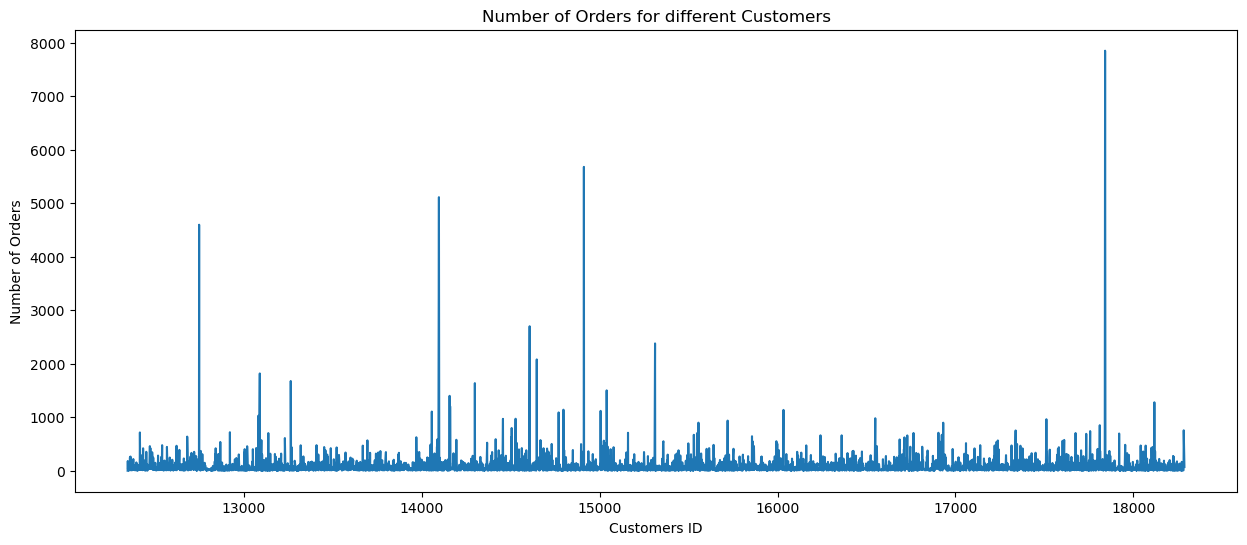

In [66]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))

plt.plot(orders.cust_id, orders.invoice_num)

plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')

plt.show()

## How much money spent by each customers?

In [67]:
df_new.groupby(by = ['cust_id', 'country']).sum()

,,year_month,month,day,hour,quantity,unit_price,amount_spent
cust_id,country,,,,,,,
12346,United Kingdom,201101,1,2,10,74215,1.04,77183.60
12347,Iceland,36598483,1383,441,2219,2458,481.21,4310.00
12348,Finland,6232657,257,111,472,2341,178.71,1797.24
12349,Italy,14681103,803,73,657,631,605.10,1757.55
12350,Norway,3418734,34,51,272,197,65.30,334.40
...,...,...,...,...,...,...,...,...
18280,United Kingdom,2011030,30,10,90,45,47.65,180.60
18281,United Kingdom,1407742,42,49,70,54,39.36,80.82
18282,United Kingdom,2413316,116,60,146,103,62.39,178.05


In [68]:
df_new.groupby(by = ['cust_id', 'country'])['amount_spent'].sum()

cust_id  country       
12346    United Kingdom    77183.60
12347    Iceland            4310.00
12348    Finland            1797.24
12349    Italy              1757.55
12350    Norway              334.40
                             ...   
18280    United Kingdom      180.60
18281    United Kingdom       80.82
18282    United Kingdom      178.05
18283    United Kingdom     2094.88
18287    United Kingdom     1837.28
Name: amount_spent, Length: 4347, dtype: float64

In [69]:
df_new.groupby(by = ['cust_id', 'country'], as_index = False)['amount_spent'].sum()

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


In [70]:
money_spent = df_new.groupby(by = ['cust_id', 'country'], as_index = False)['amount_spent'].sum()

money_spent

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


### Top FIVE customers who spend highest money

In [71]:
money_spent.sort_values(by='amount_spent', ascending = False).head()

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


### Top TEN customers who spend highest money

In [72]:
money_spent.sort_values(by='amount_spent', ascending = False).head(10)

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


### Visualizing - Money spent for different customers

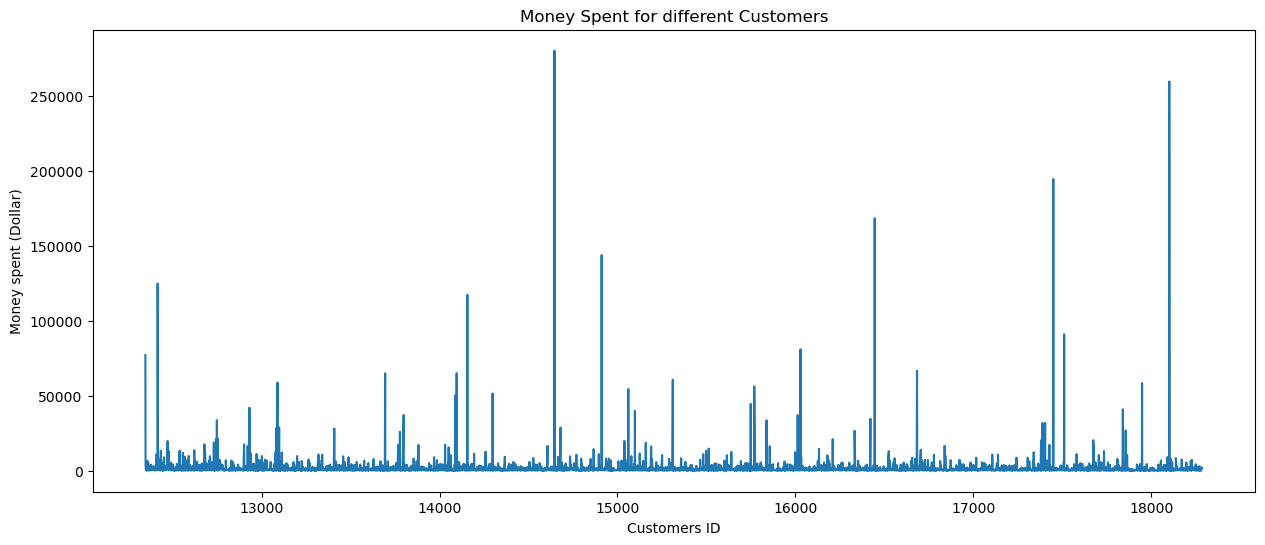

In [73]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))

plt.plot(money_spent.cust_id, money_spent.amount_spent)

plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')

plt.show()

### Number of order for different months

In [74]:
color = sns.color_palette()

In [75]:
df_new.groupby('invoice_num')

In [76]:
 df_new.groupby('invoice_num')['year_month']

In [77]:
df_new.groupby('invoice_num')['year_month'].unique()

invoice_num
536365    [201012]
536366    [201012]
536367    [201012]
536368    [201012]
536369    [201012]
            ...   
581583    [201112]
581584    [201112]
581585    [201112]
581586    [201112]
581587    [201112]
Name: year_month, Length: 18536, dtype: object

In [78]:
df_new.groupby('invoice_num')['year_month'].apply(lambda x: tuple(x.unique())).value_counts()

(201111,)    2658
(201110,)    1929
(201109,)    1756
(201105,)    1555
(201012,)    1400
(201106,)    1393
(201107,)    1331
(201103,)    1321
(201108,)    1281
(201104,)    1149
(201102,)     998
(201101,)     987
(201112,)     778
Name: year_month, dtype: int64

In [79]:
df_new.groupby('invoice_num')['year_month'].apply(lambda x: tuple(x.unique())).value_counts().sort_index()

(201012,)    1400
(201101,)     987
(201102,)     998
(201103,)    1321
(201104,)    1149
(201105,)    1555
(201106,)    1393
(201107,)    1331
(201108,)    1281
(201109,)    1756
(201110,)    1929
(201111,)    2658
(201112,)     778
Name: year_month, dtype: int64

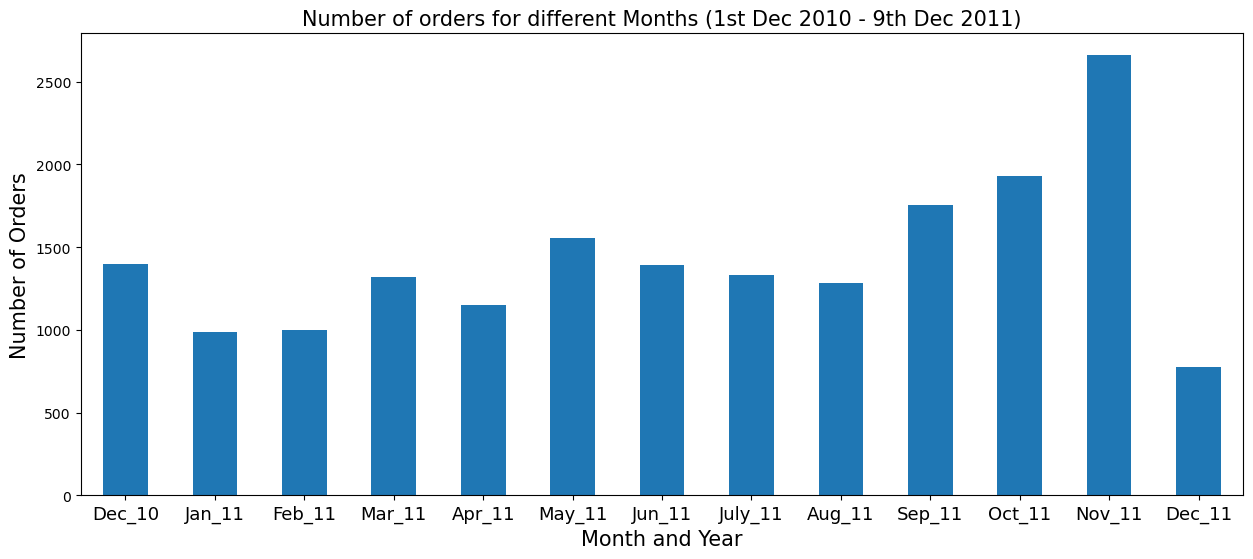

In [80]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar', color = color[0],
                                                                                                         figsize = (15,6))

ax.set_xlabel('Month and Year',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize = 15)

t = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11')

ax.set_xticklabels(t, rotation='horizontal', fontsize=13)

plt.show()

### How many orders (per day)?

In [81]:
df_new.groupby('invoice_num')

In [82]:
df_new.groupby('invoice_num')['day']

In [83]:
df_new.groupby('invoice_num')['day'].unique()

invoice_num
536365    [3]
536366    [3]
536367    [3]
536368    [3]
536369    [3]
         ... 
581583    [5]
581584    [5]
581585    [5]
581586    [5]
581587    [5]
Name: day, Length: 18536, dtype: object

In [84]:
df_new.groupby('invoice_num')['day'].apply(lambda x: tuple(x.unique())).value_counts()

(4,)    4033
(3,)    3455
(2,)    3185
(1,)    2863
(5,)    2831
(7,)    2169
Name: day, dtype: int64

In [85]:
df_new.groupby('invoice_num')['day'].apply(lambda x: tuple(x.unique())).value_counts().sort_index()

(1,)    2863
(2,)    3185
(3,)    3455
(4,)    4033
(5,)    2831
(7,)    2169
Name: day, dtype: int64

### Day wise sales count/business

In [86]:
df_new.groupby('invoice_num')

In [87]:
df_new.groupby('invoice_num')['day']

In [88]:
df_new.groupby('invoice_num')['day'].unique()

invoice_num
536365    [3]
536366    [3]
536367    [3]
536368    [3]
536369    [3]
         ... 
581583    [5]
581584    [5]
581585    [5]
581586    [5]
581587    [5]
Name: day, Length: 18536, dtype: object

In [89]:
df_new.groupby('invoice_num')['day'].apply(lambda x: tuple(x.unique())).value_counts()

(4,)    4033
(3,)    3455
(2,)    3185
(1,)    2863
(5,)    2831
(7,)    2169
Name: day, dtype: int64

In [90]:
df_new.groupby('invoice_num')['day'].apply(lambda x: tuple(x.unique())).value_counts().sort_index()

(1,)    2863
(2,)    3185
(3,)    3455
(4,)    4033
(5,)    2831
(7,)    2169
Name: day, dtype: int64

### Lets visualizat Day wise sales count/business

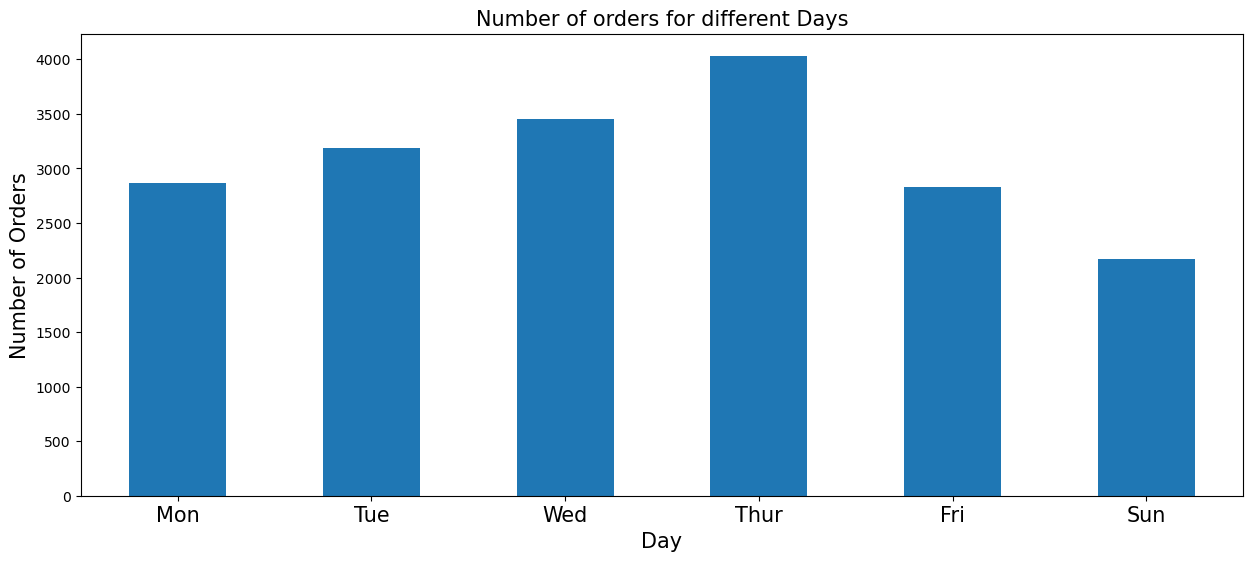

In [91]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind = 'bar',color=color[0],
                                                                                                          figsize=(15,6))

ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
d = ('Mon','Tue','Wed','Thur','Fri','Sun')
ax.set_xticklabels(d, rotation='horizontal', fontsize=15)
plt.show()

### Discover patterns for Unit Price

In [92]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

<b> Min value for product is zero, so there are some free products

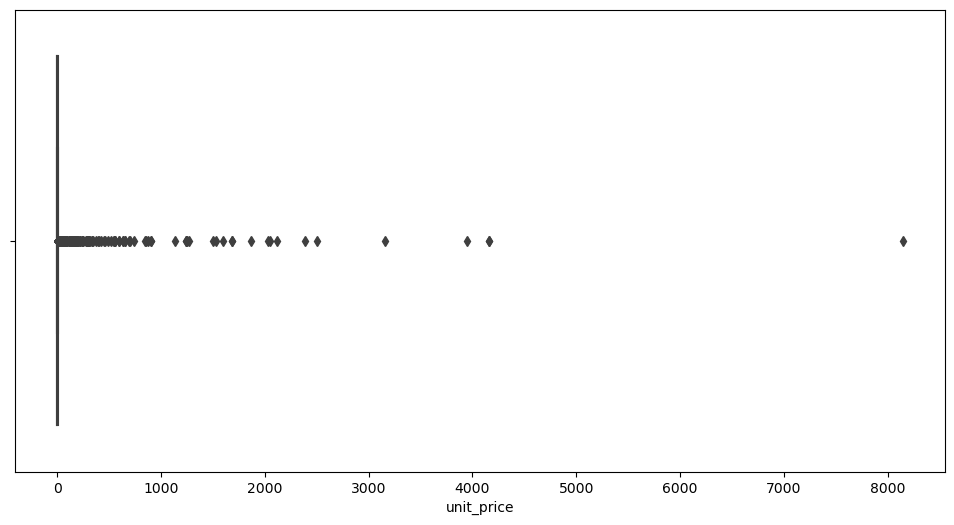

In [93]:
# check the distribution of unit price
plt.subplots(figsize = (12,6))

sns.boxplot(df_new.unit_price)
plt.show()

<b> Filter only free products(cost = 0)

In [94]:
df_free = df_new[df_new.unit_price == 0]
len(df_free)

40

In [95]:
df_free.year_month

9302      201012
33576     201012
40089     201012
47068     201101
47070     201101
56674     201101
86789     201102
130188    201103
139453    201103
145208    201104
157042    201104
187613    201105
198383    201105
279324    201107
282912    201107
285657    201108
298054    201108
314745    201108
314746    201108
314747    201108
314748    201108
358655    201109
361825    201109
379913    201110
395529    201110
420404    201110
436428    201111
436597    201111
436961    201111
439361    201111
446125    201111
446793    201111
446794    201111
454463    201111
454464    201111
479079    201111
479546    201111
480649    201111
485985    201111
502122    201111
Name: year_month, dtype: int64

In [96]:
df_free.year_month.value_counts()

201111    14
201108     6
201101     3
201110     3
201012     3
201103     2
201104     2
201105     2
201107     2
201109     2
201102     1
Name: year_month, dtype: int64

In [97]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

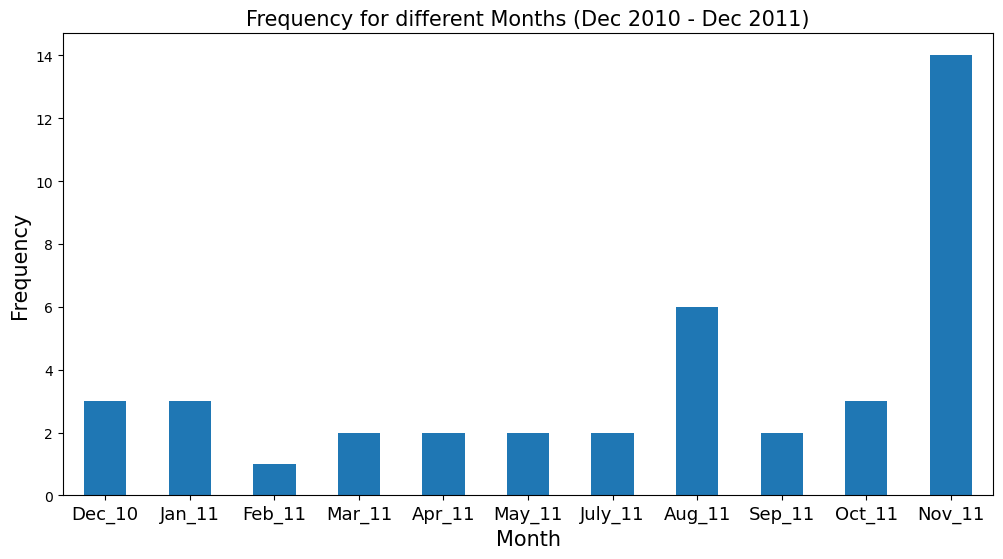

In [98]:
ax = df_free.year_month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)

m = ('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11')

ax.set_xticklabels(m, rotation='horizontal', fontsize=13)
plt.show()

### How many orders for each country?

In [99]:
df_new

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,12,5,12,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,12,5,12,22899,children's apron dolly girl,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,12,5,12,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,12,5,12,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France


In [100]:
df_new.groupby('country')

In [101]:
df_new.groupby('country')['invoice_num']

In [102]:
df_new.groupby('country')['invoice_num'].count()

country
Australia                 1185
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7238
European Community          60
Finland                    685
France                    8342
Germany                   9042
Greece                     145
Iceland                    182
Israel                     248
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1462
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485
Sweden                     451


In [103]:
df_new.groupby('country')['invoice_num'].count().sort_values()

country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


### Visualization - How many orders for each country?

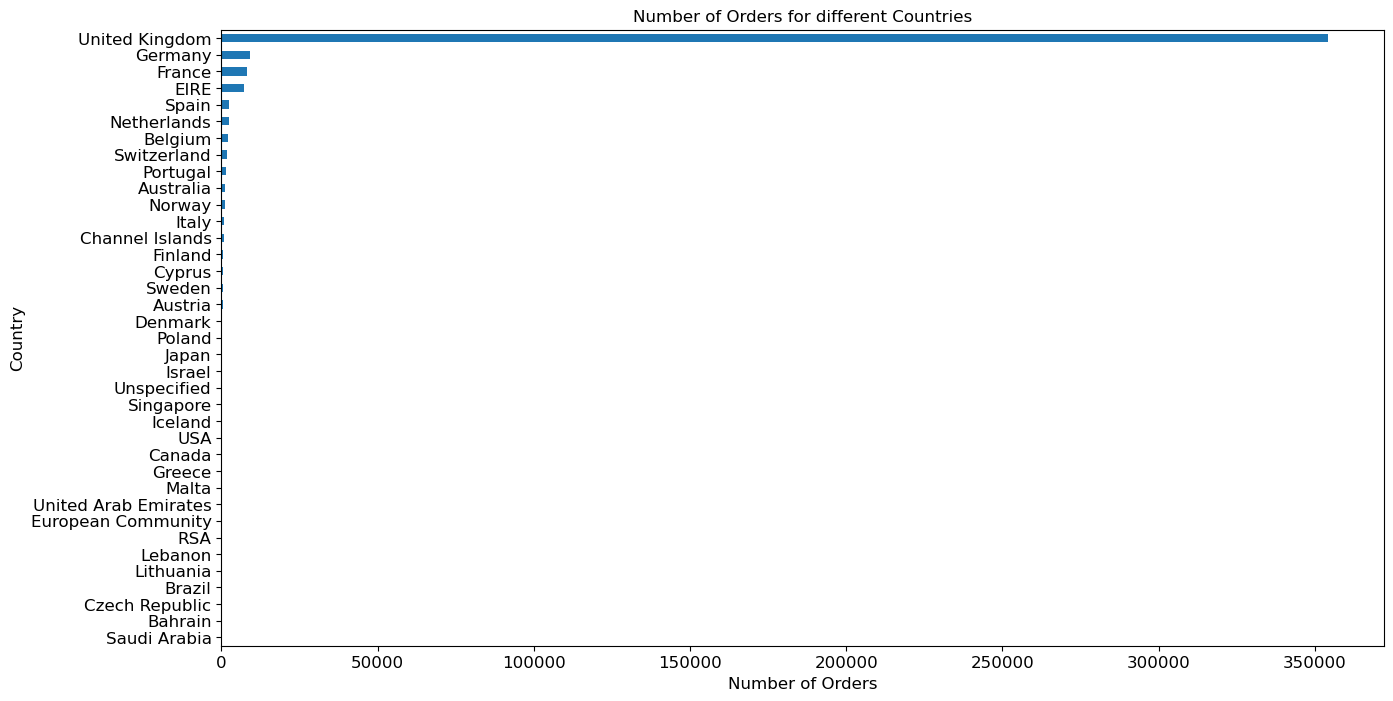

In [104]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

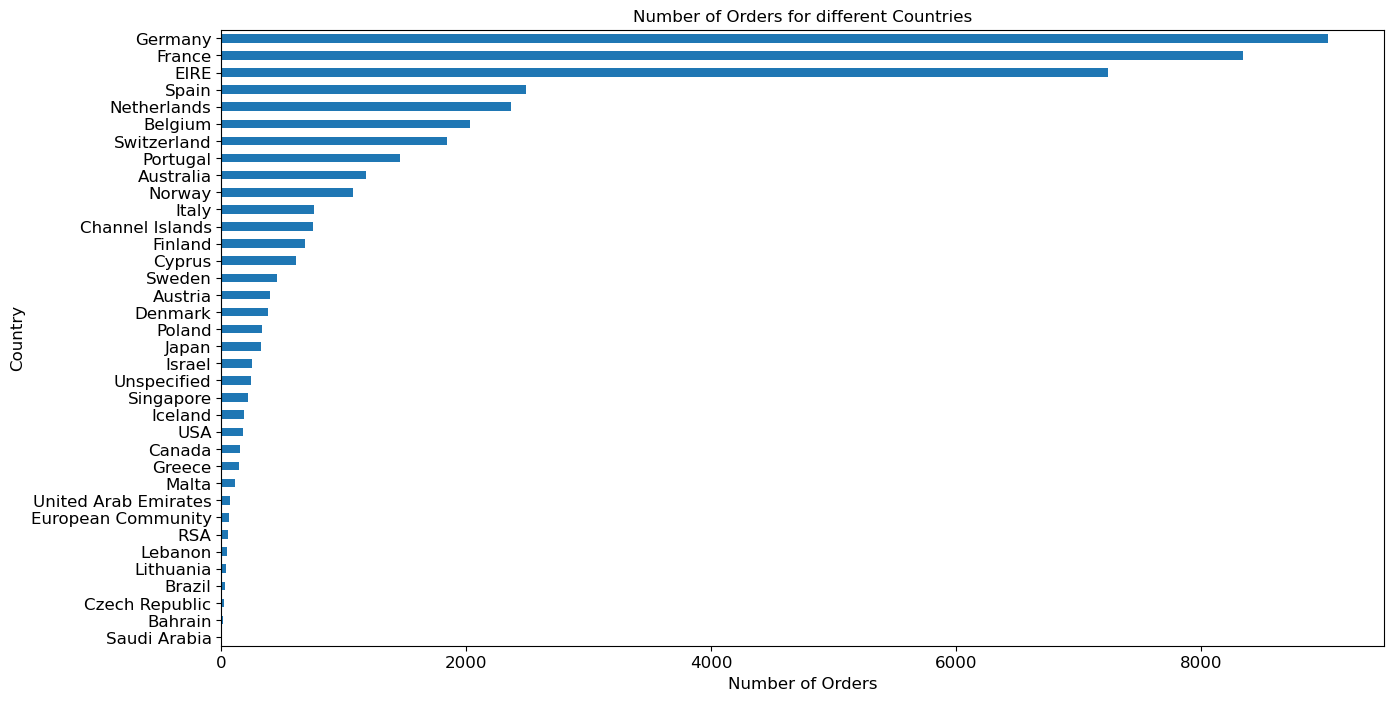

In [105]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### How much money spent by each country?

In [106]:
df_new

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,12,5,12,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,12,5,12,22899,children's apron dolly girl,6,2.10,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,12,5,12,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,12,5,12,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France


In [107]:
df_new.groupby('country')

In [108]:
df_new.groupby('country')['amount_spent']

In [109]:
df_new.groupby('country')['amount_spent'].sum()

country
Australia               1.385213e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.045044e+04
Cyprus                  1.359038e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.655459e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.090240e+05
Germany                 2.288671e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.221690e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal                3.3439

In [110]:
df_new.groupby('country')['amount_spent'].sum().sort_values()

country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

### Visualization - How much money spent by each country?

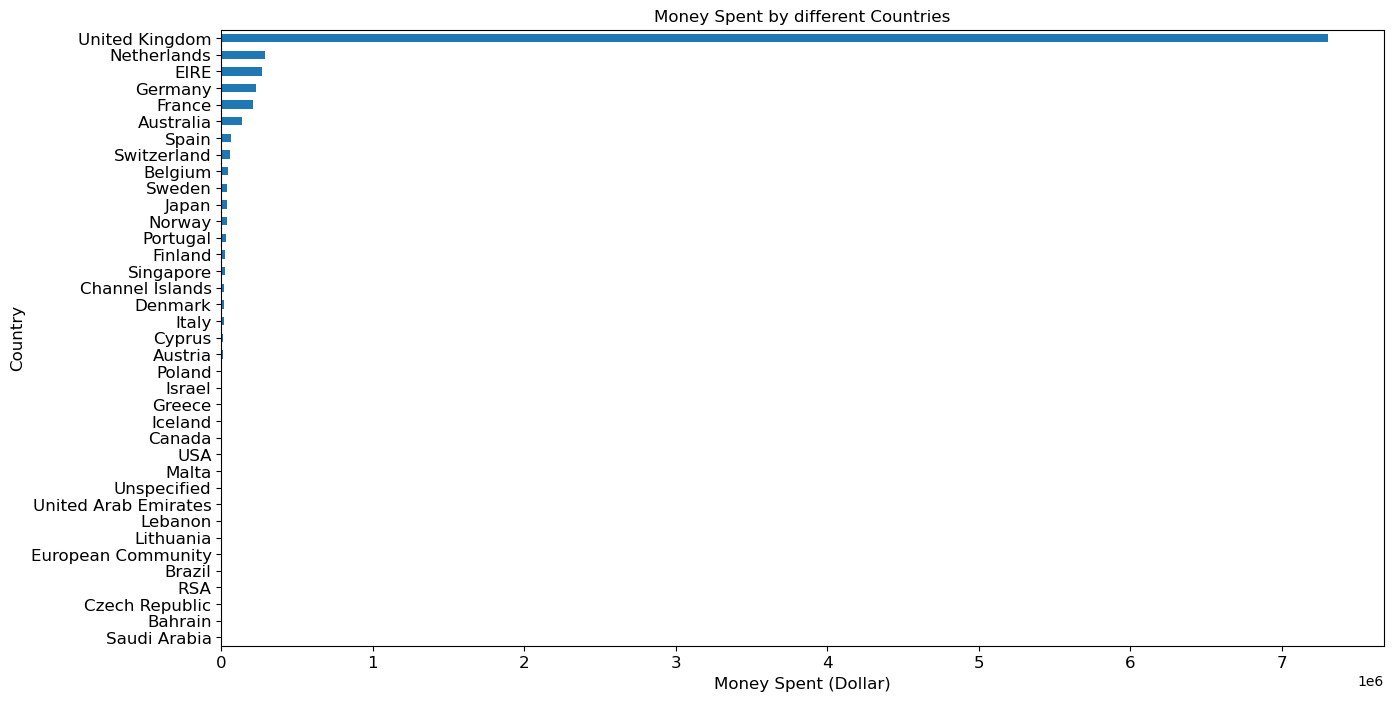

In [111]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

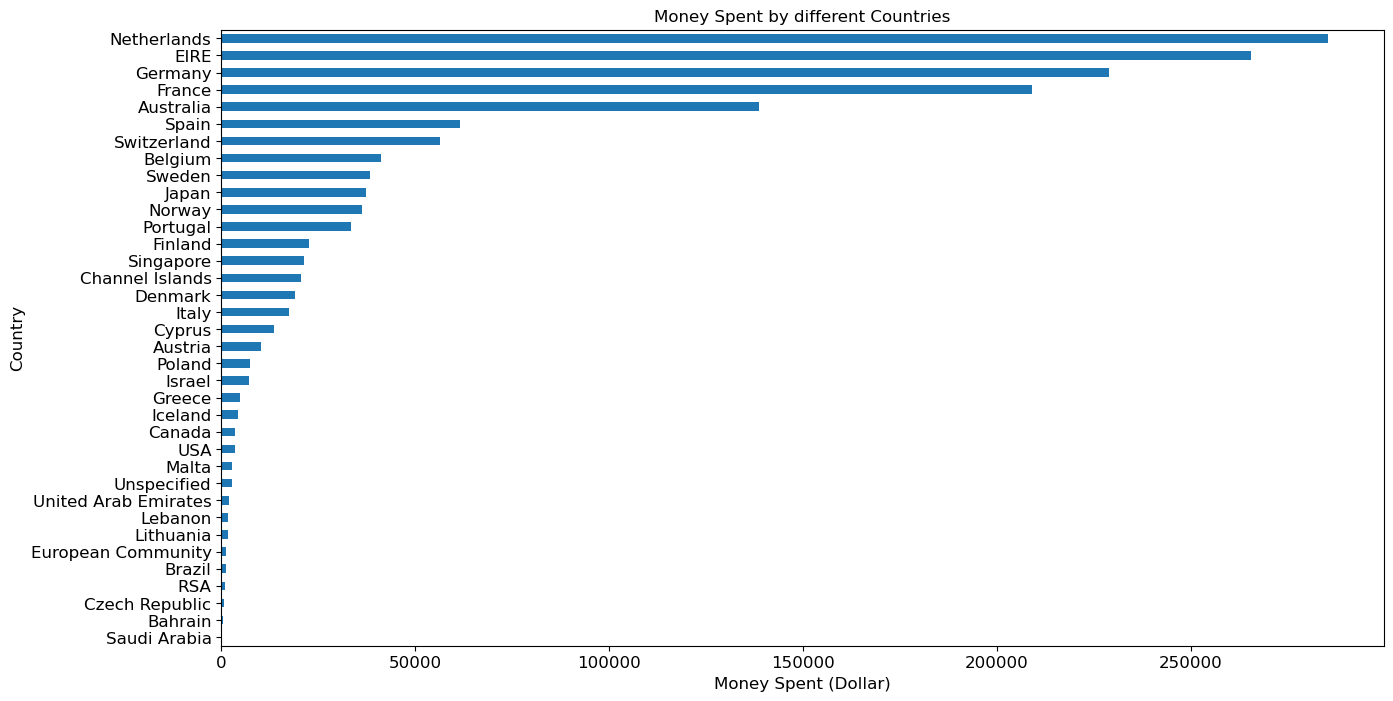

In [112]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()